# UNSUPERVISED LEARNING

In this notebook, we're going to implement:

a) Clustering

b) PCA

c) Non-linear dimension reduction
 

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clustering_data = pd.read_csv("DataClustering.csv")

In [3]:
clustering_data.head()

x1        x2        x3        x4
0  0.832354  1.389428  0.962226  0.993671
1  1.256087  1.500487  0.904118  0.738035
2  0.976953  1.058524  1.217530  1.357238
3  1.014365  1.122684  1.195847  0.984144
4  1.041386  1.219014  0.864819  1.720825

In [4]:
clustering_data.isnull().sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64

#### Hence, there is no null data in the given data set

In [5]:
clustering_data.shape

(351, 4)

C:\Users\Revati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


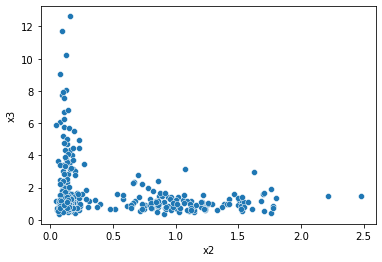

In [6]:
sns.scatterplot(clustering_data['x2'], clustering_data['x3'])
plt.show()

C:\Users\Revati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


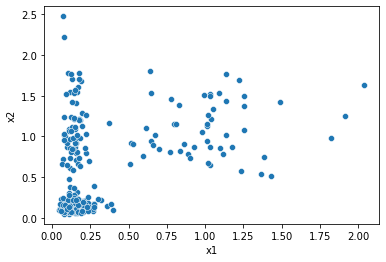

In [7]:
sns.scatterplot(clustering_data['x1'], clustering_data['x2'])
plt.show()

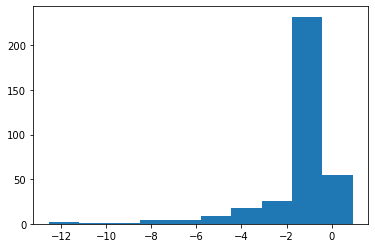

In [8]:


plt.hist(clustering_data['x1']-clustering_data['x3'])
plt.show()

C:\Users\Revati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1440 with 0 Axes>

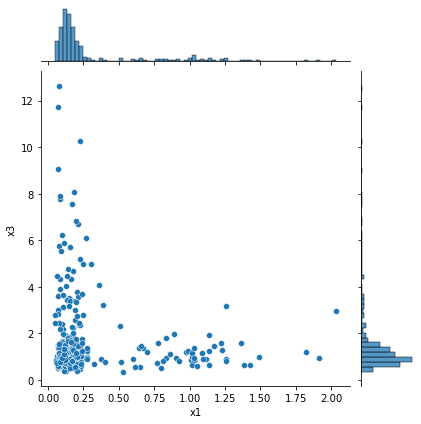

In [9]:


plt.figure(figsize = (20, 20))

sns.jointplot(clustering_data['x1'], clustering_data['x3'])

plt.show()

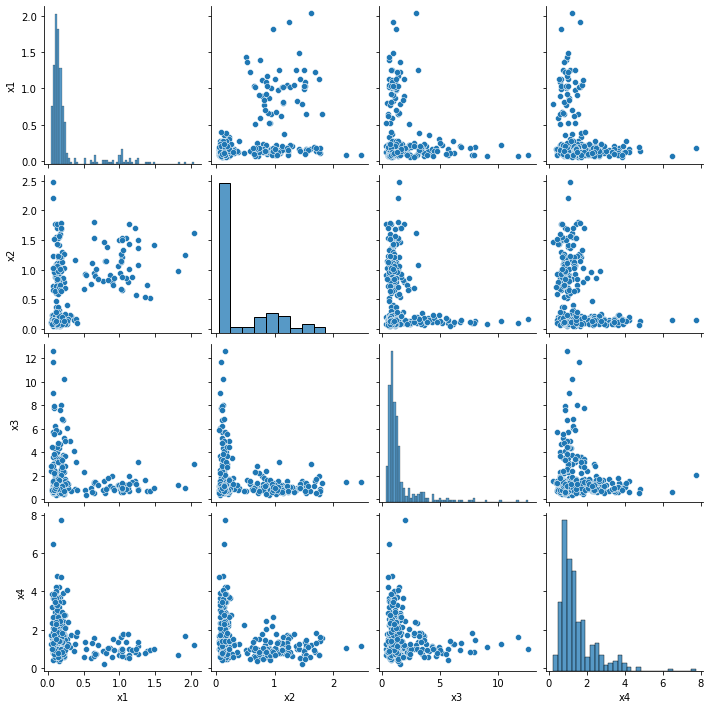

In [10]:
sns.pairplot(clustering_data, x_vars = ["x1", "x2", "x3", "x4"], 
               y_vars = ["x1", "x2", "x3", "x4"],  
               kind= "scatter"
              )
plt.show()



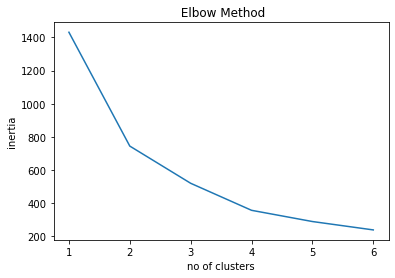

In [11]:
from sklearn.cluster import KMeans
inertia =[]
X= clustering_data.iloc[:, :].values
for i in range(1,7):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,7), inertia)
plt.title(' Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()    

#### From the above graph we can see that k=4 is optimal 

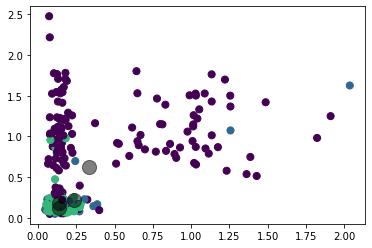

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [13]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

Number of clusters: 4


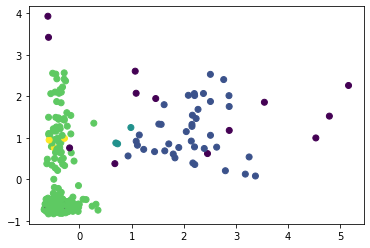

In [14]:


from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.63, min_samples=3,  ).fit(X)
labels=db.labels_
y_pred = DBSCAN(eps=0.63, min_samples=3,  ).fit_predict(X)


plt.scatter(X[:,0], X[:,1], c=y_pred)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Number of clusters: {}'.format(n_clusters_))


#### As we can see the no of clusters obtained is 4 if we kept eps value as 0.63 and min_samples as 3

<AxesSubplot:xlabel='x1', ylabel='x2'>

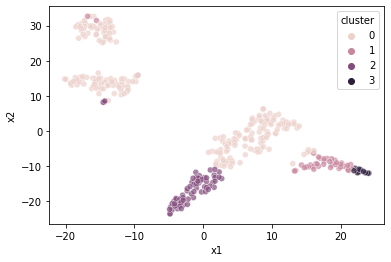

In [15]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=2).fit_transform(X)
dftsneFull = pd.DataFrame(Xtsne)
clustering_ori=y_kmeans
dftsneFull['cluster'] = clustering_ori
dftsneFull.columns = ['x1','x2','cluster']

sns.scatterplot(data=dftsneFull,x='x1',y='x2',hue='cluster',legend="full",alpha=0.7)


In [16]:
pca_data = pd.read_csv('DataPCA.csv')
pca_data.head()

x1        x2        x3        x4        x5        x6        x7
0  0.840261 -1.088160  4.861744  4.273055  4.312457 -0.137834  0.076453
1  1.320591 -1.174113  5.247360  3.295027  4.283410 -0.363759 -0.170605
2  1.537909 -1.175882  5.556251  3.394183  3.971574 -0.888398  0.080617
3  0.363552 -1.130608  4.329890  5.547488  4.539732  0.342330  0.251953
4  1.567938 -1.114719  5.542104  2.493071  4.156157 -0.609694 -0.291367

In [17]:
pca_data.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

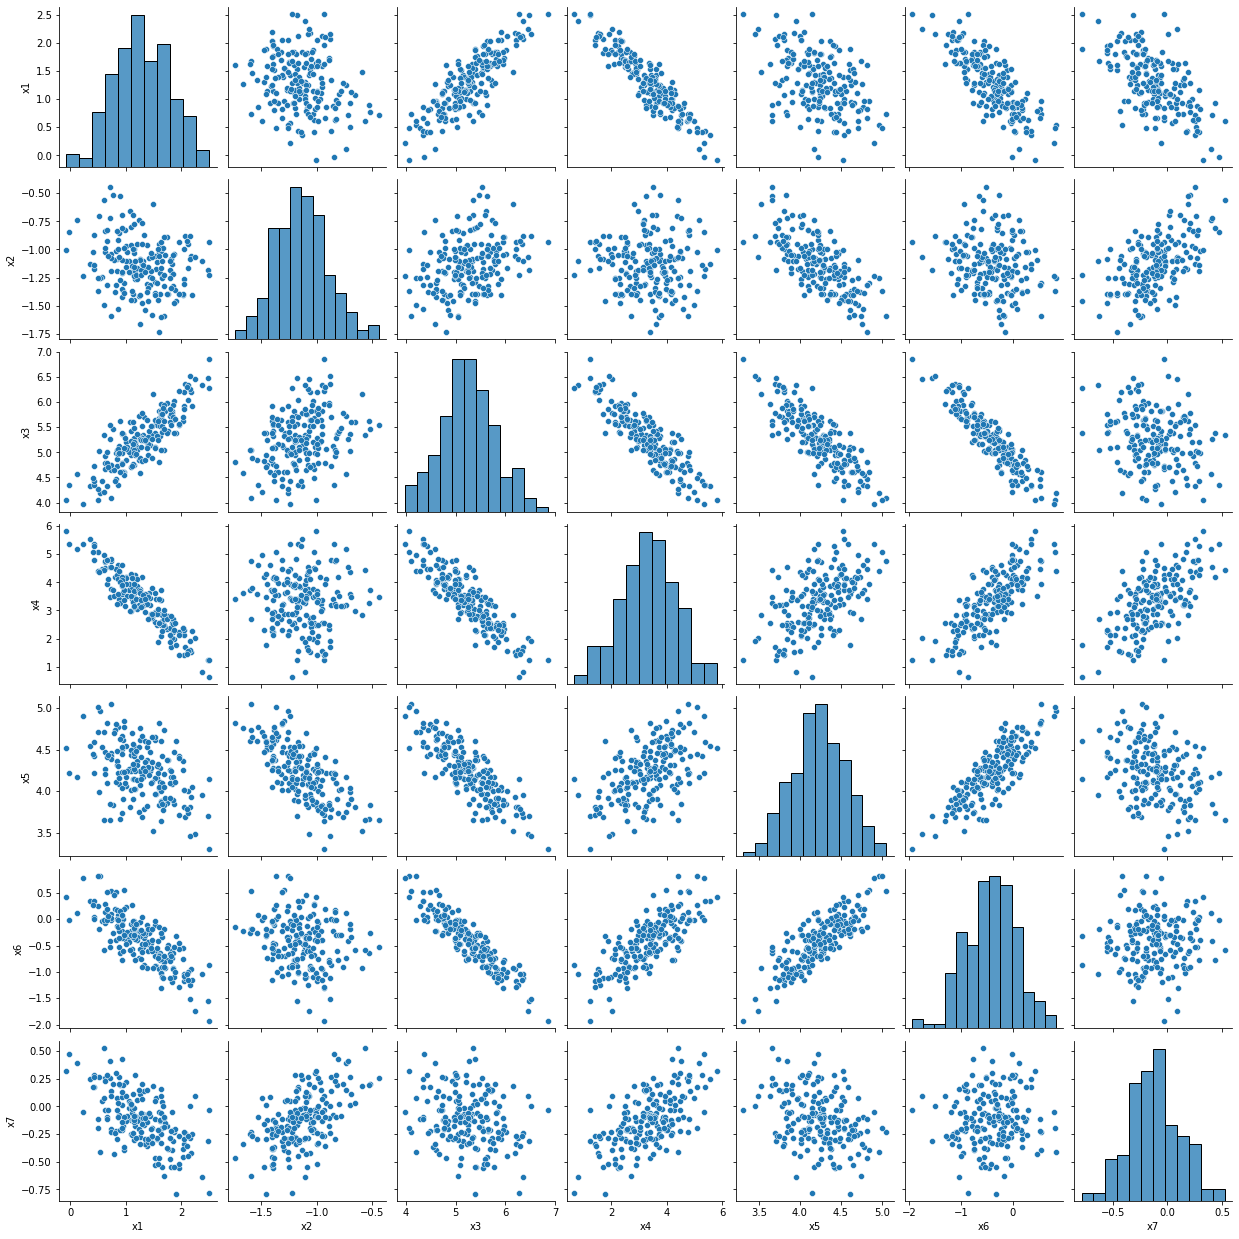

In [18]:
sns.pairplot(pca_data, x_vars = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"], 
               y_vars = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"],  
               kind= "scatter",
              )
plt.show()

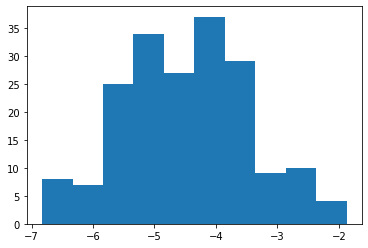

In [19]:

plt.hist(pca_data['x2']-pca_data['x4'], )
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pca_data.drop('x7',axis=1)
y = pca_data['x7']
X = scaler.fit_transform(X)

In [21]:
new_data = pd.DataFrame(data=X,columns=pca_data.columns[1:])

In [22]:
new_data.head(10)

x2        x3        x4        x5        x6        x7
0 -0.879702  0.203581 -0.717812  0.937130  0.240310  0.572178
1  0.066901 -0.164833 -0.013778 -0.047812  0.151606  0.102283
2  0.495178 -0.172416  0.550176  0.052044 -0.800676 -0.988900
3 -1.819170  0.021640 -1.688840  2.220573  0.934360  1.570859
4  0.554357  0.089743  0.524348 -0.855438 -0.236998 -0.409231
5  1.510589  0.587372  1.742488 -1.942390 -1.304463 -1.596239
6 -0.846312 -1.683082 -1.659341  1.271237  1.632362  1.025269
7 -0.615495 -0.701989 -1.177572  0.619548  1.875222  2.005670
8  0.034991  0.129591  0.146219 -0.080516 -0.202836 -0.223111
9 -0.347040 -0.309843 -0.418446  0.056308  0.075827 -0.307648

In [23]:
new_data.describe()



x2            x3            x4            x5            x6  \
count  1.900000e+02  1.900000e+02  1.900000e+02  1.900000e+02  1.900000e+02   
mean   1.051790e-17 -4.890825e-16  8.688956e-16  4.177945e-16 -2.178521e-15   
std    1.002642e+00  1.002642e+00  1.002642e+00  1.002642e+00  1.002642e+00   
min   -2.681699e+00 -2.565362e+00 -2.350181e+00 -2.711687e+00 -2.832879e+00   
25%   -7.063108e-01 -6.968414e-01 -6.775764e-01 -7.023327e-01 -6.510581e-01   
50%   -3.076318e-02 -4.300486e-02 -9.747732e-03  5.874870e-02  2.534350e-02   
75%    6.918035e-01  5.929503e-01  6.765831e-01  6.586803e-01  7.001440e-01   
max    2.400735e+00  2.978622e+00  2.925970e+00  2.492669e+00  2.511689e+00   

                 x7  
count  1.900000e+02  
mean   9.641410e-17  
std    1.002642e+00  
min   -3.169225e+00  
25%   -6.834685e-01  
50%    7.274151e-02  
75%    6.583283e-01  
max    2.570934e+00

In [24]:
from sklearn.decomposition import PCA
pca = PCA( )
new_pca_data = pca.fit(new_data)


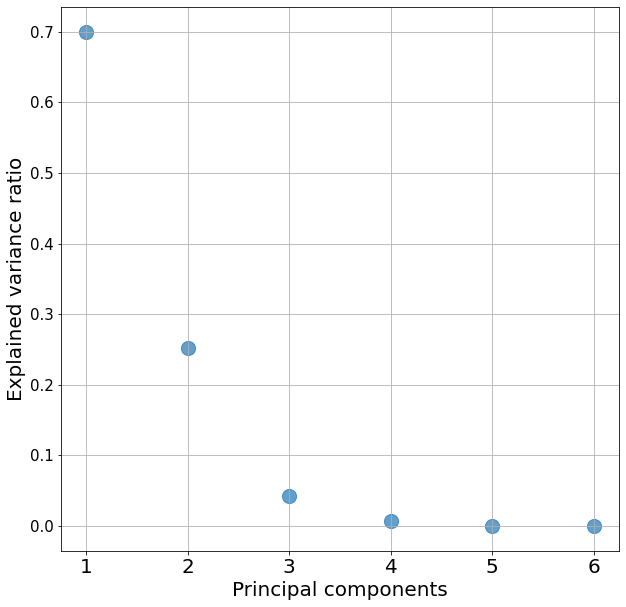

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(x=[i+1 for i in range(len(new_pca_data.explained_variance_ratio_))],
            y=new_pca_data.explained_variance_ratio_,
           s=200, alpha=0.70)
plt.grid(True)

plt.xlabel("Principal components",fontsize=20)
plt.xticks([i+1 for i in range(len(new_pca_data.explained_variance_ratio_))],fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=20)
plt.show()

In [26]:
new_data_trans = pca.transform(new_data)
new_data_trans = pd.DataFrame(data=new_data_trans)
new_data_trans.head(5)

0         1         2         3         4         5
0 -1.455770  0.657353 -0.205226  0.016524 -0.010131  0.007183
1 -0.091176 -0.229175  0.072063  0.032538  0.004677 -0.021446
2  1.211085  0.018722 -0.845098  0.133464 -0.010225 -0.012265
3 -3.648450  0.945142 -0.412909  0.242106  0.003123  0.001536
4  1.156378 -0.281668  0.329914 -0.142362 -0.007564  0.001925

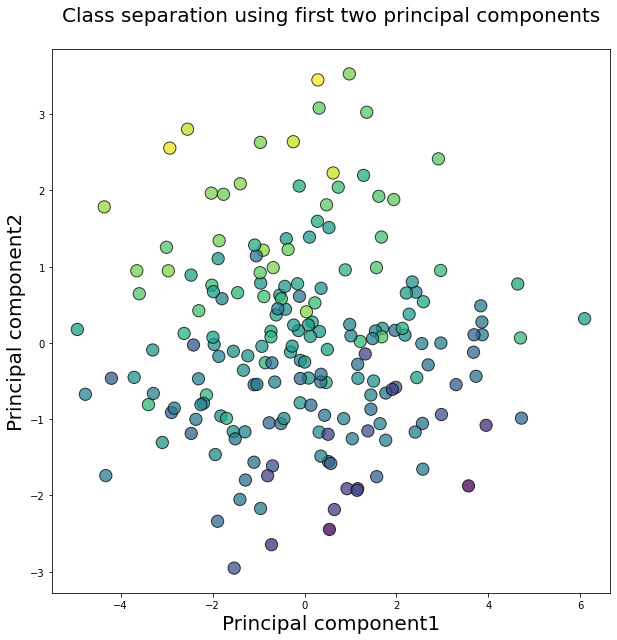

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(new_data_trans[0],new_data_trans[1],c=pca_data['x7'],edgecolors='k',alpha=0.75,s=150)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component1",fontsize=20)

plt.ylabel("Principal component2",fontsize=20)
plt.show()

In [28]:
kpca_data = pd.read_csv('DataKPCA.csv')
kpca_data.head()

x1         x2         x3         x4        x5        x6        x7
0  2.596641  15.263178 -46.289607 -10.993265 -2.266729  1.935832  2.039688
1  3.096286  14.784802 -48.175614  -8.799362 -2.220871  1.851201  1.921974
2  3.360246  14.774917 -49.471841  -9.030501 -1.760447  1.753114  2.041933
3  2.214819  15.027394 -43.200400 -13.565001 -2.643018  2.200463  2.141847
4  3.398576  15.115756 -49.416644  -6.857672 -2.025936  1.788085  1.875540

In [29]:
kpca_data.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

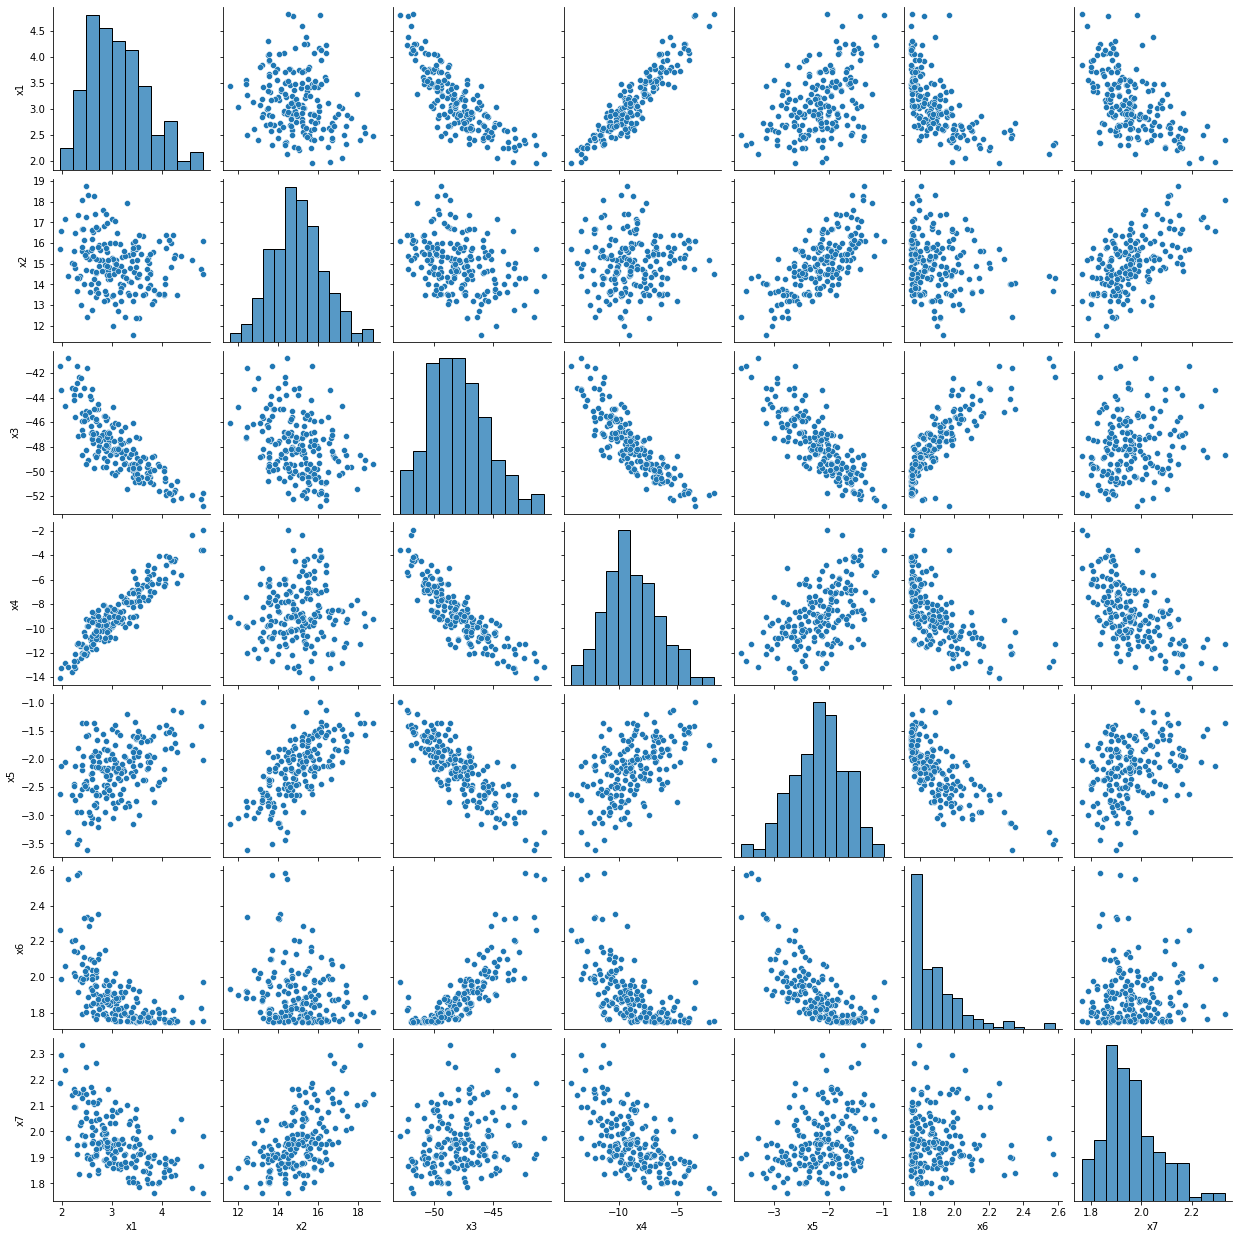

In [30]:
sns.pairplot(kpca_data, x_vars = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"], 
               y_vars = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"],  
               kind= "scatter",
              )
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = kpca_data.drop('x7',axis=1)
y = kpca_data['x7']
X = scaler.fit_transform(X)

In [32]:
new_data = pd.DataFrame(data=X,columns=kpca_data.columns[1:])

In [33]:
new_data.head(5)

x2        x3        x4        x5        x6        x7
0 -0.893531  0.214228  0.660423 -0.935894 -0.180173  0.263020
1 -0.043014 -0.155081 -0.108467  0.005283 -0.089272 -0.268499
2  0.406310 -0.162711 -0.636915 -0.093875  0.823388 -0.884520
3 -1.543484  0.032201  1.919837 -2.039160 -0.926059  1.924996
4  0.471557  0.100418 -0.614413  0.838262  0.297131 -0.664890

In [34]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA( )
new_kpca_data = kpca.fit(new_data)

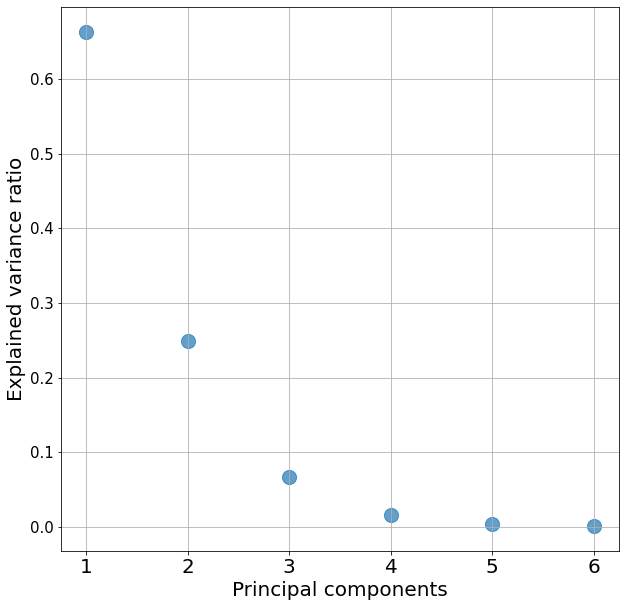

In [35]:
plt.figure(figsize=(10,10))
kpca_transform = kpca.fit_transform(new_data)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.scatter(x=[i+1 for i in range(len(explained_variance_ratio))],
            y=explained_variance_ratio,
           s=200, alpha=0.70)
plt.grid(True)

plt.xlabel("Principal components",fontsize=20)
plt.xticks([i+1 for i in range(len(explained_variance_ratio))],fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=20)
plt.show()